# Introduction to Simple Linear Regression


## Learning Objectives and outcomes

- Introduction of linear regression in a simple setting.

- Basic assumptions of the model.

- Terminology - 'intercept', 'coefficient'.

- The Least Squares method.
    
- Implement linear regression in sklearn and statsmodels

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!head data/Advertising.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# read data to a dataframe
data = pd.read_csv('data/Advertising.csv',
                   index_col=0)[['TV', 'Sales']]

print(data.shape)
data.head()

(200, 2)


,TV,Sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9


Note that TV is dollars in thousands and sales are in thousands of units too.

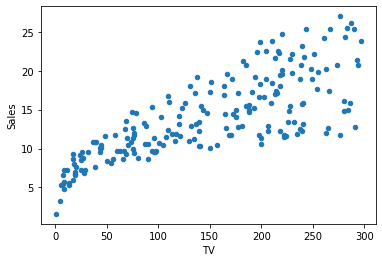

In [4]:
# plot data
data.plot(kind='scatter', x='TV', y='Sales')
plt.show()

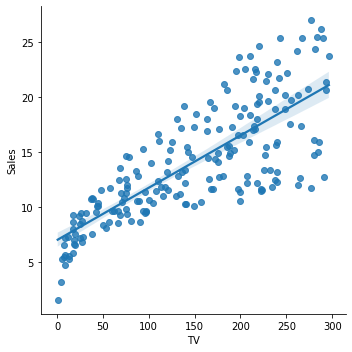

In [5]:
sns.lmplot(x='TV', y='Sales', data=data)

In [6]:
# Let's discuss very briefly the notation we will be using

# We usually represent independent variables (input variables) with X:

X = data.TV

# similarly the dependent variable with y:

y = data.Sales

In [7]:
display(data.head(3))

print(X[3], y[3])

,TV,Sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3


17.2 9.3


Recall that a line equation on the plane can be written as: 

$$ y = m\cdot x + b$$

In [8]:
# this function will make a y prediction for y (sales)
# given x (TV) and fixed m (slope) and b (intercept)

def predict_y(m=1, x=2, b=1):
    return m*x + b

__Your Turn__

Suppose m = 0.04 and b = 7:

- Find y if x = 230.1

- Find y if x = 44.5

- Find y if x = 17.2

In [9]:
m=0.04
b=7
print(predict_y(x=230.1, m=m, b=b))
print(predict_y(x=44.5, m=m, b=b))
print(predict_y(x=17.2, m=m, b=b))

16.204
8.78
7.688


In [10]:
X = data.head(3).TV

In [11]:
predict_y(m=0.04, x=X, b=7)

1    16.204
2     8.780
3     7.688
Name: TV, dtype: float64

In [12]:
def draw_line(X, y, intercept=7, slope=0.04, xlabel='Tv Advertisements',
              ylabel='Sales', title='A prediction for Sales'):
    """
    draws a line with given intercept and slope together with given data.
    parameters:
    X: array
    y: array
    intercept: float, preferably between 5 and 9 in this case
    slope: float, preferably between 0.02 and 0.08
    xlabel: str, label of the x-axis in the figure.
    ylabel: str, label of the y-axis in the figure.
    return: a figure with data and a regression line with given intercept and slope.
    """
    # find the predicted values. These points lie on the line with
    # given slope and intecept
    y_pred = intercept + slope * X

    # create a new figure and set the figure size
    plt.figure(figsize=(10, 8))

    # plot data points as scatter
    plt.scatter(x=X, y=y)

    # plot the prediction line
    plt.plot(X, y_pred, c='r', label='Regression Line')

    plt.ylim(bottom=1)

    # set labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # set the title of the figure
    plt.title(title)

    plt.legend()
    plt.show()
    return

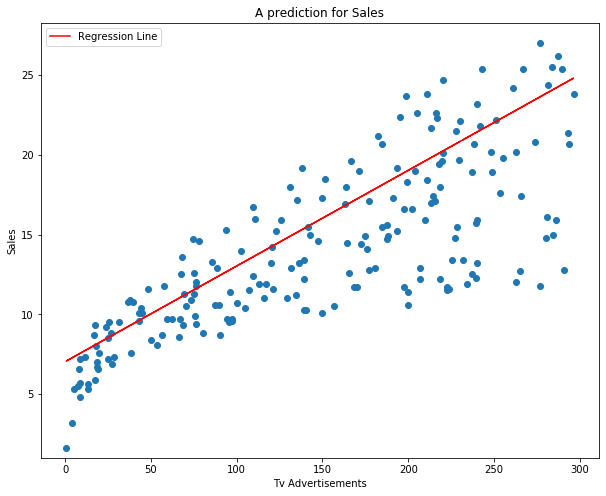

In [13]:
tv = data.TV.values
sales = data.Sales.values
draw_line(tv, sales, intercept=7.03, slope=0.06)

## Assumptions

* Assume $\mbox{Sales} \approx \mbox{TV}$  linearly.

* There is an initial value (baseline) of the Sales. 

* Data might not be fit on a line but the errors are random.

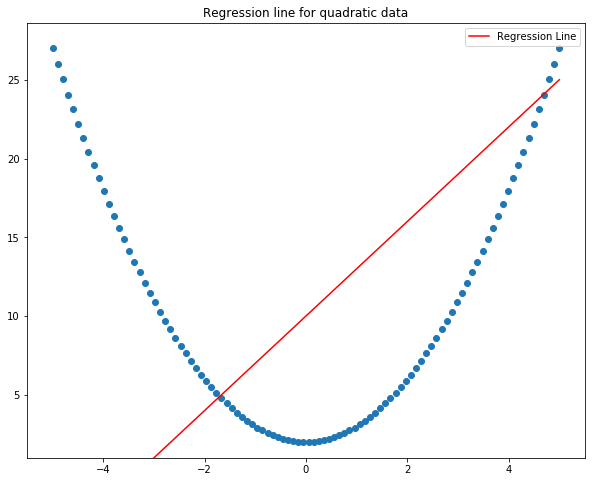

In [14]:
# Sometimes linearity assumption is too strict

expr_x = np.linspace(-5, 5, 100)
y = expr_x**2 + 2
draw_line(expr_x, y, intercept=10, slope=3,
          xlabel='',
          ylabel='',
          title='Regression line for quadratic data')

In [15]:
X = np.linspace(-1, 1, 100)

In [16]:
errors = np.random.normal(loc=0, scale=1, size=100)

(array([ 5.,  4., 12., 23., 17., 20.,  8.,  5.,  3.,  3.]),
 array([-2.22891574, -1.71343461, -1.19795347, -0.68247234, -0.1669912 ,
         0.34848993,  0.86397106,  1.3794522 ,  1.89493333,  2.41041447,
         2.9258956 ]),
 <a list of 10 Patch objects>)

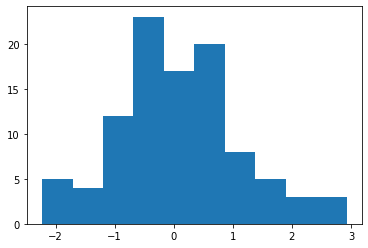

In [17]:
plt.hist(errors)

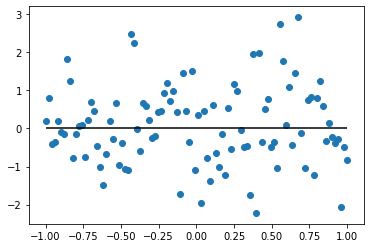

In [18]:
plt.scatter(X, errors)
plt.hlines(y=0, xmin=-1, xmax=1)
plt.show()

## Model  - Single Variable Case

- In simple linear regression we assume that if we would have population of both X and y variables then we would see the following relation:

$$ Y = \beta_{0} + \beta X + \epsilon$$
 
- $ \beta_{0}, \beta$ are parameters of the model and called the intercept and coefficient of the linear model respectively. 

- $\epsilon$ is the irreducible error term. Depend on the problem at hand we might assume that these errors are coming from measurement mistakes, personal beliefs, recording errors, etc.

- Our goal is given samples from X and y, try to find estimates $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$ for population parameters $\beta_{0}$ and  $\beta_{1}$
- Once we find such estimates we can use them for future predictions: $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$ we will make a prediction:

$$ \hat{y}_{i} = \hat{\beta}_{0} + \hat{\beta}_{1} x_{1} $$

<img src="visuals/best_fit.png" cap="Transformed dataset"  width='300'/>

## Using Sklearn for simple linear regression

- Fitting a regression model is very easy with python. 

- All we have to do is importing LinearRegression class from sklearn.linear_model module

- For more details and examples of implementation you can check:

[Sklearn Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

__Your Turn!__

- Now using 'tv' and 'Sales' try to fit a linear model with sklearn. Find the corresponding intercept and slope values.

In [19]:
X = data.TV.values
y = data.Sales.values

In [20]:
X.shape

(200,)

In [21]:
X

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [22]:
X = X.reshape(-1, 1)

X.shape

(200, 1)

In [23]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [24]:
# import LinearRegression class
from sklearn.linear_model import LinearRegression

In [25]:
# instantiate the class
lr = LinearRegression()
# check parameters


In [27]:
# a reshape may be necessary
print('Shape of X after reshape:', X.shape)

Shape of X after reshape: (200, 1)


In [28]:
# when you fit model learns b0_hat and b1_hat
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# now we can use fitted object to get model parameters 
print("Coefficient:", lr.coef_[0])
print("Intercept:", lr.intercept_)

Coefficient: 0.047536640433019764
Intercept: 7.032593549127693


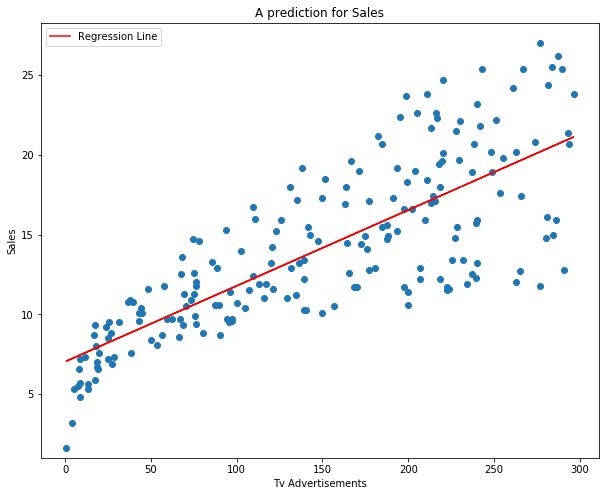

In [30]:
tv = data.TV.values
sales = data.Sales.values
draw_line(tv, sales, intercept=lr.intercept_, slope=lr.coef_[0])

## How do we find an estimator? Least Squares method.
<a name="least_squares">
</a>

__Q: How to find 'best' line?__


<img src="visuals/errors.png" cap="Transformed dataset"  width='500'/>



* Recall that we know actual values $y$ for the sales and for given coefficients $\beta_{0}, \beta_{1}$ we can make a prediction $\hat{y}$. 

* Error for each prediction $e_{i} = y_{i} - \hat{y_{i}}$

### Residual sum of squares (RSS)


$$RSS = e_{1}^{2} + e_{2}^{2} + \cdots + e_{n}^{2}$$

* Wait a minute! Why do we get the squares?


The least square method minimizes the RSS.

* Good news: The least square can be calculated exactly because it has a closed form:

$$ \mbox{RSS} = (y_1 - \hat{b}_{0} -\hat{b}_{1}x_{1} )^{2} + (y_2 - \hat{b}_{0} -\hat{b}_{1}x_{2} )^{2} + \cdots + (y_n -\hat{b}_{0} -\hat{b}_{1}x_{n} )^{2}$$

* Bad news: It requires derivatives and is complicated to derive. But no worries, python will take care of this step for us.

$$ \hat{b}_{1} = \dfrac{\sum^{n}_{i=1} (x_i - \bar{x})(y_{i}-\bar{y})}{\sum^{n}_{i=1} (x_i - \bar{x})^{2}}$$

and 

$$ \hat{b}_{0} = \bar{y} - \hat{b}_{1}\bar{x} $$

- __Note:__ In the literature you might see some variants of RSS: Some of which are:

$$ \mbox{Mean Squared Errors (MSE)} = \frac{1}{N} \mbox{RSS}$$

$$ \mbox{Root Mean Squared Errors (RMSE)} = \sqrt{\frac{1}{N} \mbox{RSS}} $$

[Least Squares Visualized](https://phet.colorado.edu/sims/html/least-squares-regression/latest/least-squares-regression_en.html)

__Your Turn!__ (Together)

Write a function that for given X, y data it returns $\hat{b}_{0}$ and $\hat{b}_{1}$ and RSS for this data. Compare the results with sklearn's results.

Reminder:

$$ \hat{b}_{1} = \dfrac{\sum^{n}_{i=1} (x_i - \bar{x})(y_{i}-\bar{y})}{\sum^{n}_{i=1} (x_i - \bar{x})^{2}}$$

In [39]:
def least_squares(X, y):
    num = ((X - X.mean()) * (y - y.mean())).sum()
    dem = ((X - X.mean())**2).sum()
    b_1 = num / dem
    b_0 = y.mean() - b_1 * X.mean()
    rss = ((y - b_0 - b_1 * X)**2).sum()
    
    return b_1, b_0, rss

In [40]:
b_0, b_1, rss = least_squares(X, y)
b_0, b_1, rss

# returns b0, b1 and RSS

(5.967939011552337e-18, 14.0225, 1083429.75)

Now use statsmodel or sklearn to compare results.

In [33]:
X = X.reshape(-1,1)

In [34]:
lr = LinearRegression()

lr.fit(X,y)
print(lr.intercept_, lr.coef_)

7.032593549127693 [0.04753664]


In [35]:
# let's use draw_line again for the given estimates.

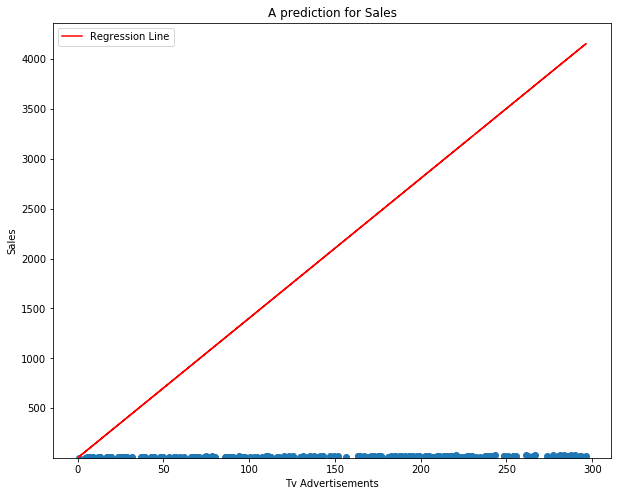

In [38]:
draw_line(X, y, intercept=b_0, slope=b_1)

## Linear Regression with Statsmodel

There is another library that we can use for linear models which is Statsmodel.

- [check the documentation](http://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS)

- Now let's use statsmodel to fit a linear model to our data.

In [ ]:
import statsmodels.api as sm

__Your Turn__

- Try to use statsmodel library to fit a line to the advertising dataset.

In [ ]:
data